# Lending Club Case Study

## Project Plan:

# Data Understanding
    1. Load the dataset
# Data Cleaning and Manipulation
    2. Explore and clean the data
    3. Address missing data and outliers
    4. Convert data to suitable/correct format
# Data Analysis
    5. Perform Univariate and Segmented Univariate Analysis
    6. Create Business-driven, type-driven, and data-driven metrics for important variables
    7. Perform Bivariate analysis to identify combinations of driver variables
    8. Create appropriate plots
# Presentation and Recommendations
    9. Clear and Concise
    10. Realistic recommendations
    11. Upload files

### Data Understanding

#### Load the Dataset & Explore

In [427]:
# Loading the Libraries

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, time, date
import seaborn as sns
import numpy as np

In [428]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [429]:
# Loading the Data Set

data = pd.read_csv(r'C:\Users\Chris\MSc Data Science ML AI\2_Data Toolkit\LendingClubCaseStudy\loan.csv', header=0)

In [430]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [431]:
df.dtypes

 id                             int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [432]:
df.columns

Index([' id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [433]:
df.shape

(39717, 111)

In [434]:
df.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries,  id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [436]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # putting the above two together
    return missing_data # return the dataframe

missing_check(df)

,Total,Percent
verification_status_joint,39717,1.0
annual_inc_joint,39717,1.0
mo_sin_old_rev_tl_op,39717,1.0
mo_sin_old_il_acct,39717,1.0
bc_util,39717,1.0
...,...,...
delinq_amnt,0,0.0
policy_code,0,0.0
earliest_cr_line,0,0.0
delinq_2yrs,0,0.0


There are many columns where there is no data present. Dropping those columns.

In [437]:
df_drop_columns = df.dropna(axis=1, how='all')

In [438]:
df_drop_columns.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,16-Jun,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [439]:
df2 = df_drop_columns

In [440]:
def missing_check_dropped(df2):
    total = df2.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False) #percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # putting the above two together
    return missing_data # return the dataframe

missing_check_dropped(df2)

,Total,Percent
next_pymnt_d,38577,0.971297
mths_since_last_record,36931,0.929854
mths_since_last_delinq,25682,0.646625
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
chargeoff_within_12_mths,56,0.001410
collections_12_mths_ex_med,56,0.001410


In [441]:
df2.shape

(39717, 57)

In [442]:
df3 = df2.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [443]:
df3.shape

(39717, 54)

In [444]:
def missing_check_dropped(df3):
    total = df3.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False) #percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # putting the above two together
    return missing_data # return the dataframe

missing_check_dropped(df3)

,Total,Percent
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
collections_12_mths_ex_med,56,0.001410
chargeoff_within_12_mths,56,0.001410
revol_util,50,0.001259
tax_liens,39,0.000982
title,11,0.000277


In [445]:
df3.dtypes

 id                             int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [446]:
df3['term'] = df3['term'].str[:2]
df3['int_rate'] = df3['int_rate'].str[:-1]

In [447]:
df3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,3,10.65,162.87,B,B2,...,171.62,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,6,15.27,59.83,C,C4,...,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,3,15.96,84.33,C,C5,...,649.91,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,3,13.49,339.31,C,C1,...,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,6,12.69,67.79,B,B5,...,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [448]:
df3['term'] = pd.to_numeric(df3['term'])

In [449]:
df3['int_rate'] = pd.to_numeric(df3['int_rate'])

In [450]:
df4 = df3.drop(['emp_title'], axis=1)

In [451]:
df4['emp_length'] = df4.emp_length.str.extract('(\d+)')

In [452]:
df4['emp_length'] = pd.to_numeric(df4['emp_length'])

In [453]:
df4['issue_d']  = pd.to_datetime(df4['issue_d'], errors = 'coerce')

In [454]:
df4['earliest_cr_line']  = pd.to_datetime(df4['earliest_cr_line'], errors = 'coerce')

In [455]:
df5 = df4.drop(labels=['url', 'desc', 'purpose', 'title'], axis=1)

In [456]:
df5['revol_util'] = df5['revol_util'].str[:-1]
df5['revol_util'] = pd.to_numeric(df5['revol_util'])

In [457]:
df5['last_pymnt_d'] = pd.to_datetime(df5['last_pymnt_d'], errors='coerce')

In [458]:
df5['last_credit_pull_d'] = pd.to_datetime(df5['last_credit_pull_d'], errors='coerce')

In [459]:
df5.dtypes

 id                                    int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                           float64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
earliest_cr_line              datetime64[ns]
inq_last_6

In [460]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
term,39717.0,3.802251,1.327852,3.00,3.00,3.000000,6.000000e+00,6.000000e+00
int_rate,39717.0,12.021177,3.724825,5.42,9.25,11.860000,1.459000e+01,2.459000e+01
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
emp_length,38642.0,5.092050,3.408338,1.00,2.00,4.000000,9.000000e+00,1.000000e+01
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06


In [461]:
df5.isna().sum()

 id                               0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                       39717
loan_status                       0
pymnt_plan                        0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line              14848
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                   

## Identify Risky Loan Applicants

#### Risky loan applicants would be those who are borrowers who default on on their loans. They cause the largest amount of loss to the lenders. The customers labeled as charged-off are the defaulters. Identify the risky loan applicants (showing charged-off). This is the aim of this case study. Once the risky loan applicants are identified, help the company understand the driving factors, or variables, behind loan default. Create a dataframe of defaulters along with all the relevant columns.

In [468]:
df5['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [485]:
# try correlating the loan_status column with the other columsn - univariate & bivariate
df6 = df5.filter(['member_id', 'loan_status', 'loan_amnt', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose',
                   'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp'])

In [486]:
df6

,member_id,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
0,1296599,Fully Paid,5000,B,10.0,RENT,24000.0,Verified,n,AZ,27.65,0,3,0,83.7,9,0.00
1,1314167,Charged Off,2500,C,1.0,RENT,30000.0,Source Verified,n,GA,1.00,0,3,0,9.4,4,0.00
2,1313524,Fully Paid,2400,C,10.0,RENT,12252.0,Not Verified,n,IL,8.72,0,2,0,98.5,10,0.00
3,1277178,Fully Paid,10000,C,10.0,RENT,49200.0,Source Verified,n,CA,20.00,0,10,0,21.0,37,0.00
4,1311748,Current,3000,B,1.0,RENT,80000.0,Source Verified,n,OR,17.94,0,15,0,53.9,38,524.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,Fully Paid,2500,A,4.0,MORTGAGE,110000.0,Not Verified,n,CO,11.33,0,13,0,13.1,40,0.00
39713,90607,Fully Paid,8500,C,3.0,RENT,18000.0,Not Verified,n,NC,6.40,1,6,0,26.9,9,0.00
39714,90390,Fully Paid,5000,A,1.0,MORTGAGE,100000.0,Not Verified,n,MA,2.30,0,11,0,19.4,20,0.00
39715,89243,Fully Paid,5000,A,1.0,MORTGAGE,200000.0,Not Verified,n,MD,3.72,0,17,0,0.7,26,0.00


### Create a dataframe of the above table for 'charged off' only.

In [489]:
df7 = pd.DataFrame(df6)

In [490]:
df8 = df7.loc[df7['loan_status'] == 'Charged Off']

In [491]:
df8

,member_id,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
1,1314167,Charged Off,2500,C,1.0,RENT,30000.0,Source Verified,n,GA,1.00,0,3,0,9.4,4,0.0
8,1306957,Charged Off,5600,F,4.0,OWN,40000.0,Source Verified,n,CA,5.55,0,11,0,32.6,13,0.0
9,1306721,Charged Off,5375,B,1.0,RENT,15000.0,Verified,n,TX,18.08,0,2,0,36.5,3,0.0
12,1298717,Charged Off,9000,C,1.0,RENT,30000.0,Source Verified,n,VA,10.08,0,4,0,91.7,9,0.0
14,1303503,Charged Off,10000,B,3.0,RENT,100000.0,Source Verified,n,CA,7.06,0,14,0,55.5,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118026,Charged Off,2500,D,1.0,MORTGAGE,32000.0,Not Verified,n,NE,20.00,0,11,0,35.1,32,0.0
39668,117783,Charged Off,2500,B,1.0,MORTGAGE,75000.0,Not Verified,n,NE,20.00,0,9,0,3.8,35,0.0
39669,118519,Charged Off,6500,F,9.0,MORTGAGE,213000.0,Not Verified,n,GA,6.45,0,11,0,75.3,28,0.0
39678,113093,Charged Off,1000,C,2.0,MORTGAGE,33990.0,Not Verified,n,VA,14.47,0,9,0,36.9,11,0.0


### Univariate Analysis

In [ ]:
# histograms and boxplots.
# Loan Status versus columns.

In [493]:
df8.set_index('member_id')

,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
member_id,,,,,,,,,,,,,,,,
1314167,Charged Off,2500,C,1.0,RENT,30000.0,Source Verified,n,GA,1.00,0,3,0,9.4,4,0.0
1306957,Charged Off,5600,F,4.0,OWN,40000.0,Source Verified,n,CA,5.55,0,11,0,32.6,13,0.0
1306721,Charged Off,5375,B,1.0,RENT,15000.0,Verified,n,TX,18.08,0,2,0,36.5,3,0.0
1298717,Charged Off,9000,C,1.0,RENT,30000.0,Source Verified,n,VA,10.08,0,4,0,91.7,9,0.0
1303503,Charged Off,10000,B,3.0,RENT,100000.0,Source Verified,n,CA,7.06,0,14,0,55.5,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118026,Charged Off,2500,D,1.0,MORTGAGE,32000.0,Not Verified,n,NE,20.00,0,11,0,35.1,32,0.0
117783,Charged Off,2500,B,1.0,MORTGAGE,75000.0,Not Verified,n,NE,20.00,0,9,0,3.8,35,0.0
118519,Charged Off,6500,F,9.0,MORTGAGE,213000.0,Not Verified,n,GA,6.45,0,11,0,75.3,28,0.0


array([[<AxesSubplot: title={'center': 'loan_amnt'}>,
        <AxesSubplot: title={'center': 'emp_length'}>,
        <AxesSubplot: title={'center': 'annual_inc'}>],
       [<AxesSubplot: title={'center': 'dti'}>,
        <AxesSubplot: title={'center': 'delinq_2yrs'}>,
        <AxesSubplot: title={'center': 'open_acc'}>],
       [<AxesSubplot: title={'center': 'pub_rec'}>,
        <AxesSubplot: title={'center': 'revol_util'}>,
        <AxesSubplot: title={'center': 'total_acc'}>],
       [<AxesSubplot: title={'center': 'out_prncp'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

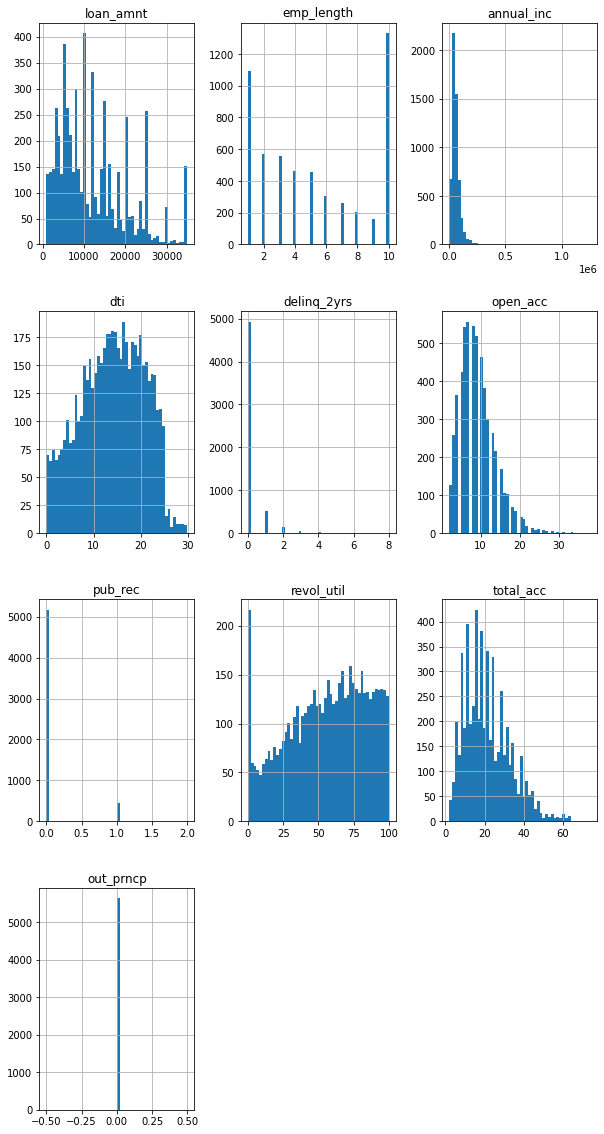

In [505]:
df8.hist(column = ['loan_status', 'loan_amnt', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 
                   'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp'], figsize=(10,20), bins=50)
